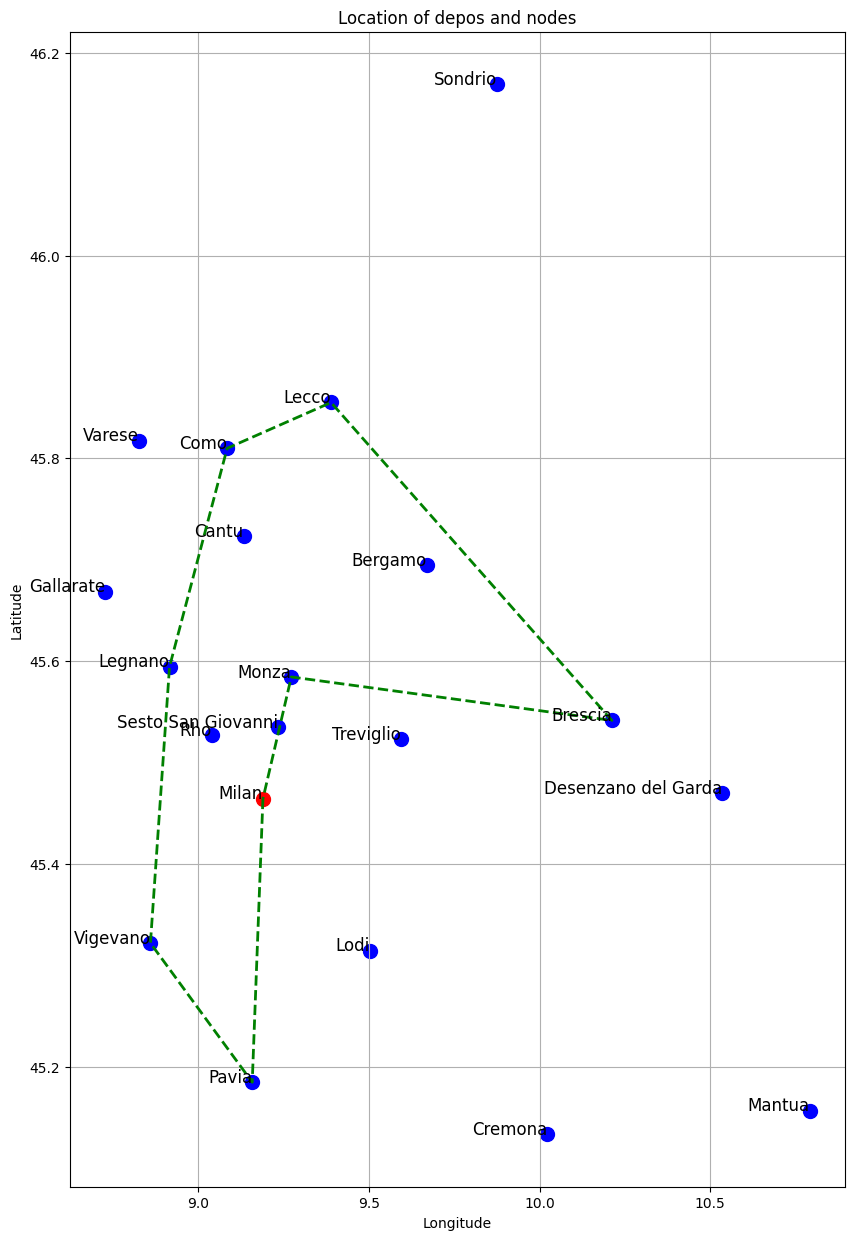

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

def fetch_data(url):
    response = requests.get(url)
    data = response.json() 
    return data

def get_solution(url,body):
    response=requests.post(url, json=body)
    data=response.json()
    return data


depos=fetch_data('http://127.0.0.1:5000/basic/depo/get-all')
nodes=fetch_data('http://127.0.0.1:5000/basic/node/get-all')

solution=get_solution('http://127.0.0.1:5000/ortools/vrp',
                {
                    "demands": [
                        {
                            "node": "Como",
                            "demand": 10
                        },
                            {
                            "node": "Lecco",
                            "demand": 5
                        },
                            {
                            "node": "Monza",
                            "demand": 10
                        },
                        {
                            "node": "Pavia",
                            "demand": 5
                        },
                        {
                            "node": "Brescia",
                            "demand": 5
                        },
                        {
                            "node": "Legnano",
                            "demand": 5
                        },
                        {
                            "node": "Vigevano",
                            "demand": 5
                        },

                    ],
                    "depo_vehicle": [
                        {
                            "depo": "Milan",
                            "plate": "AB123"
                        }
                    ]
                }
            )

df_depos = pd.DataFrame(depos)
df_nodes = pd.DataFrame(nodes)


fig, ax = plt.subplots(figsize=(15, 10))

# Plot depots in red
ax.scatter(df_depos['longitude'], df_depos['latitude'], color='red', label='Location', s=100)

# Plot nodes in blue
ax.scatter(df_nodes['longitude'], df_nodes['latitude'], color='blue', label='Location', s=100)


# Annotate depots with names
for i, row in df_depos.iterrows():
    ax.text(row['longitude'], row['latitude'], row['name'], fontsize=12, ha='right')

# Annotate nodes with names
for i, row in df_nodes.iterrows():
    ax.text(row['longitude'], row['latitude'], row['name'], fontsize=12, ha='right')


# Function to draw route lines
def draw_route(route, color):
    df=pd.concat([df_depos, df_nodes])
    connections = [(df.loc[df['id'] == i, 'longitude'].values[0], df.loc[df['id'] == i, 'latitude'].values[0]) for i in route]
    if len(connections) > 1:
        x_values, y_values = zip(*connections)
        ax.plot(x_values, y_values, color=color, linewidth=2, linestyle='--')

for idx, route_info in enumerate(solution['routes']):
    draw_route(route_info['route'],'green')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Location of depos and nodes')

plt.grid(True)
plt.show()